<a href="https://colab.research.google.com/github/fjot/project_6_neural-_networks/blob/main/project_6_neural__networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Churn Prediction**

### **Objective:**

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

Context: 
Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

### **Data Description:**

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
Link to the Kaggle project site:https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

**Data Dictionary:**

**RowNumber**: Row number.

**CustomerId**: Unique identification key for different customers.

**Surname**: Surname of the customer

**Credit Score**: Credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their 
creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.

**Geography**: The country to which the customer belongs.

**Gender**: The gender of the customer.

**Age**: Age of the customer.

**Tenure**: The period of time a customer has been associated with the bank.

**Balance**: The account balance (the amount of money deposited in the bank account) of the customer.

**NumOfProducts**: How many accounts, bank account affiliated products the person has.

**HasCrCard**: Does the customer have a credit card through the bank?

**IsActiveMember**: Subjective, but for the concept

**EstimatedSalary**: Estimated salary of the customer.

**Exited**: Did they leave the bank after all?

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix , classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
import seaborn as sns

In [ ]:
from google.colab import drive

## **EDA**
### **1. Read the dataset**

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
project_path = '/content/drive/My Drive/Colab Notebooks/'

In [ ]:
dataset_file = project_path + 'bank.csv'

In [ ]:
data = pd.read_csv(dataset_file)

In [ ]:
# print the first 5 observations of the dataset
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# print the shape of the dataset
data.shape

(10000, 14)

In [ ]:
# Looking for duplicated customerID
data.duplicated(subset=['CustomerId'])

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [ ]:
data.duplicated(subset=['RowNumber'])

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

### **2. Drop the columns which are unique for all users like IDs**

In [ ]:
# Drop the Rownumber column because has no impact for the analysis
data = data.drop(["CustomerId", "RowNumber", "Surname"], axis = 1)

In [ ]:
# print the new shape of the dataset
data.shape

(10000, 11)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [ ]:
# print the data type of the dataset
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
# To check if we have null values and the dtype for each
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### **Insights**
There is not null values

In [ ]:
# Check the value object type to convert 
data['Geography'].value_counts()

In [ ]:
# convert Geography to numric values
data['Geography'] = data['Geography'].map(lambda x: {'France': 1, 'Germany': 2, 'Spain': 3}.get(x))

In [ ]:
# Check the value object type to convert 
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
# convert Gender to numric values
data['Gender'] = data['Gender'].map(lambda x: {'Male': 1, 'Female': 2}.get(x))

In [ ]:
# print first 5 observations of the new dataset
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,2,42,2,0.00,1,1,1,101348.88,1
1,608,3,2,41,1,83807.86,1,0,1,112542.58,0
2,502,1,2,42,8,159660.80,3,1,0,113931.57,1
3,699,1,2,39,1,0.00,2,0,0,93826.63,0
4,850,3,2,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Check of the data types are numeric
data.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## **Bivariate Analysis**

### **3. Perform bivariate analysis and give your insights from the same**

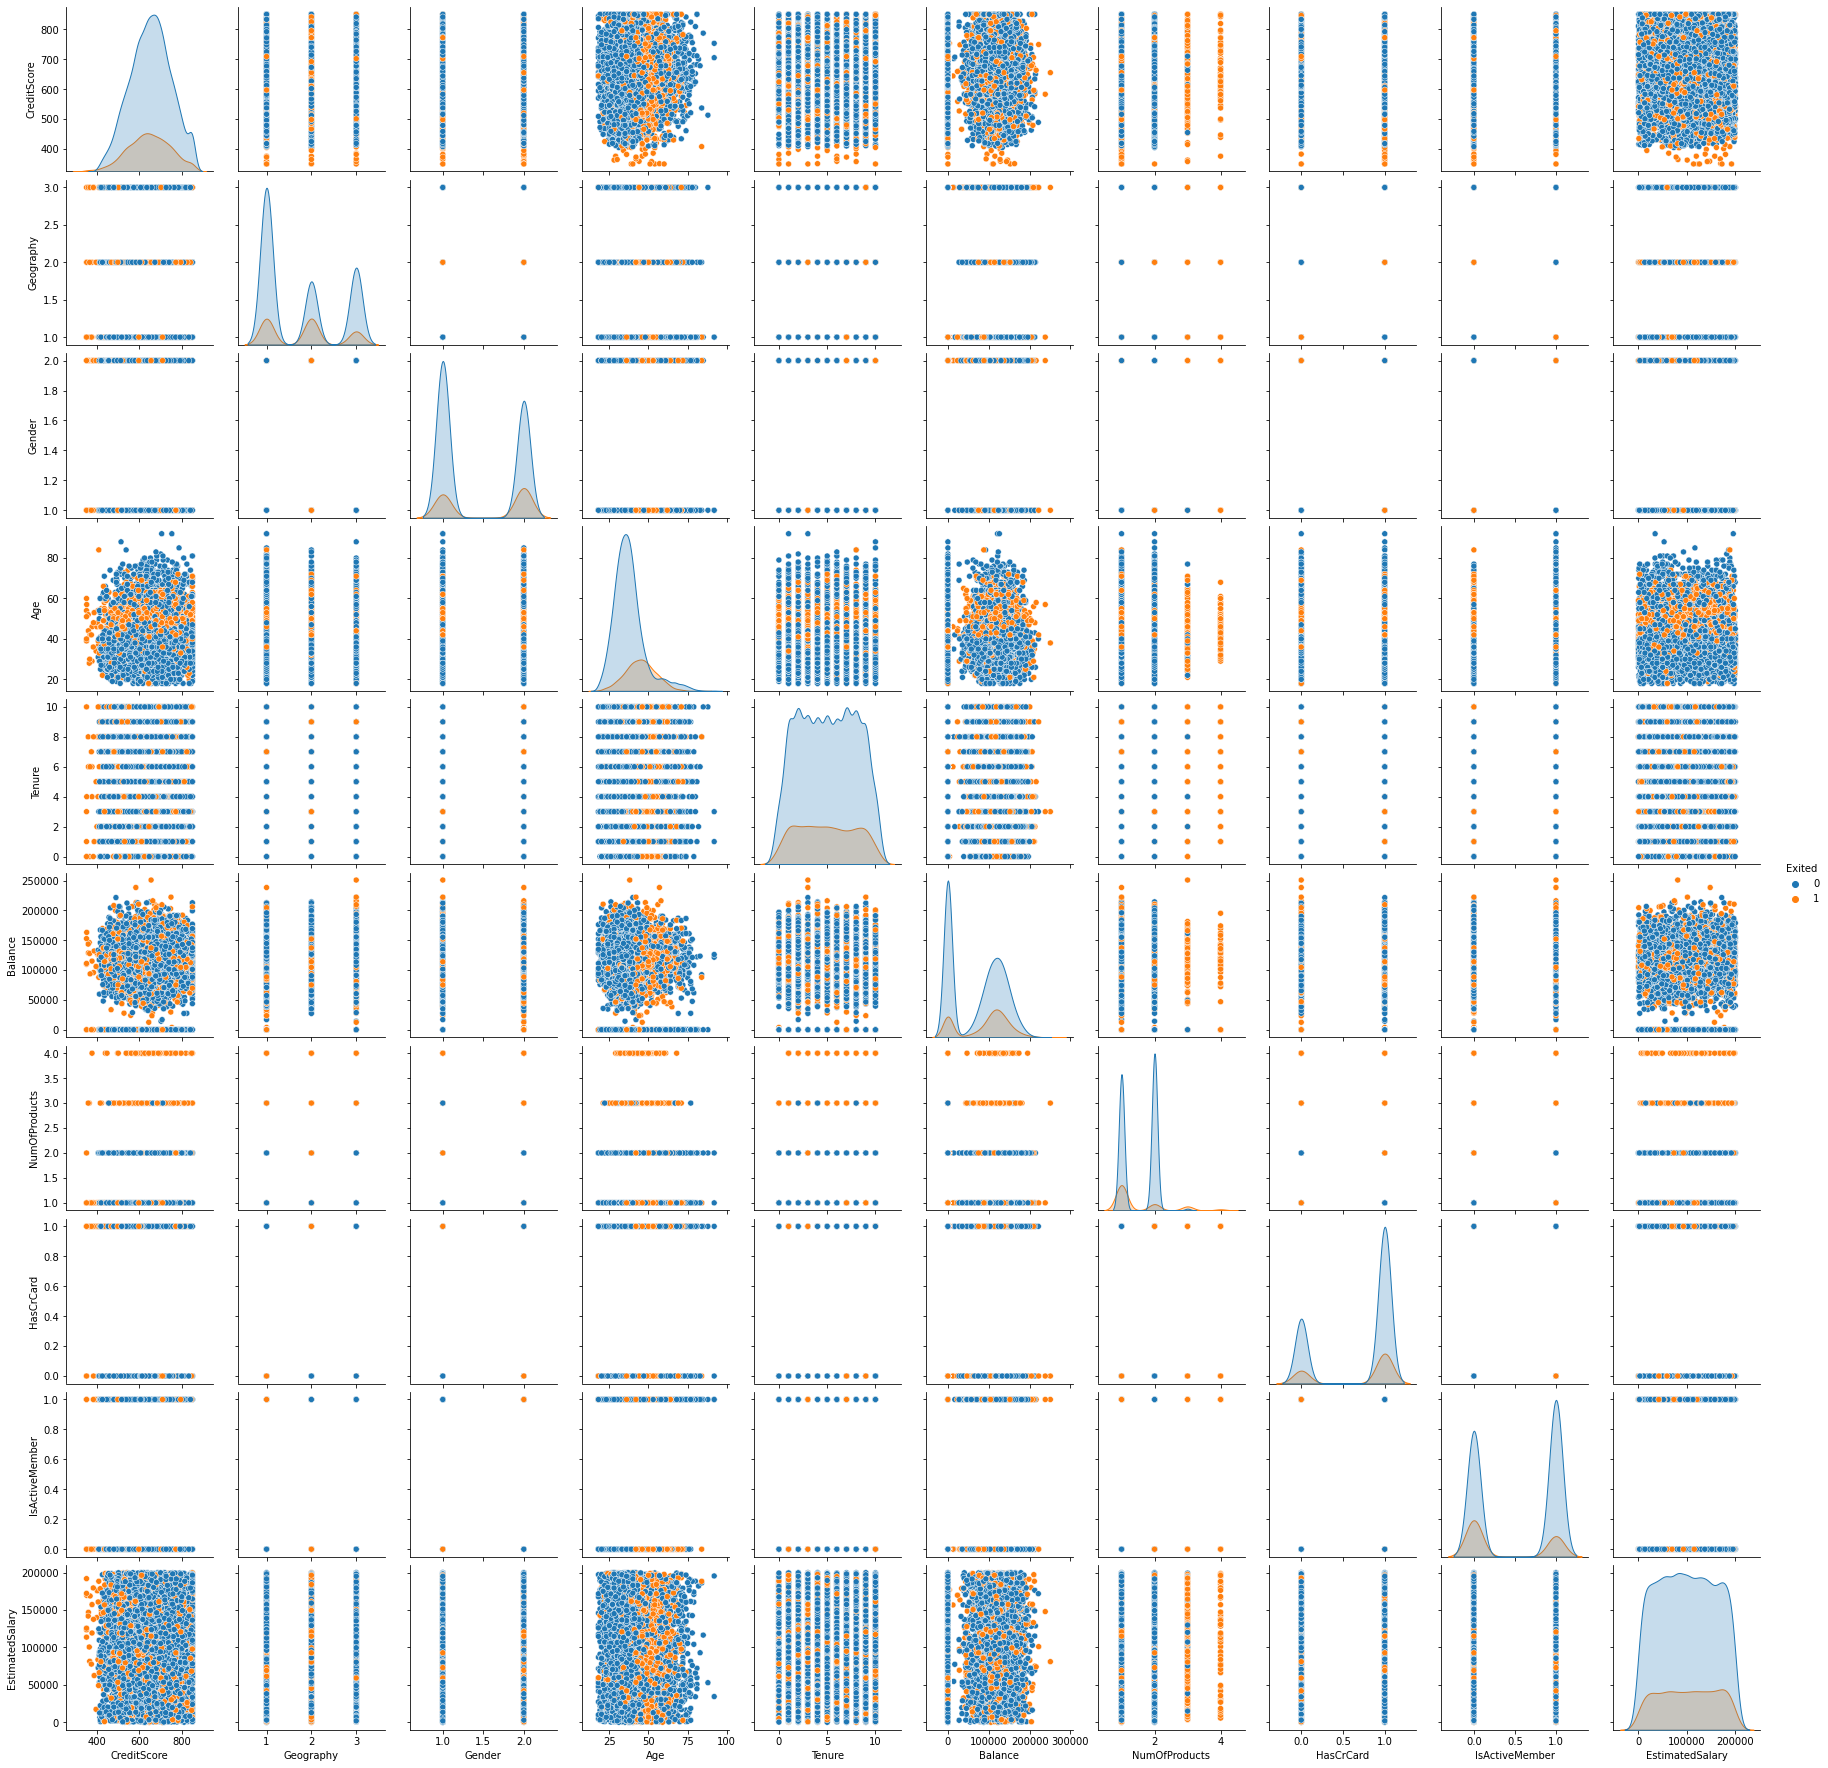

In [ ]:
# We plot pairplot to see of there are some relation between the data
sns.pairplot(data, hue = 'Exited')

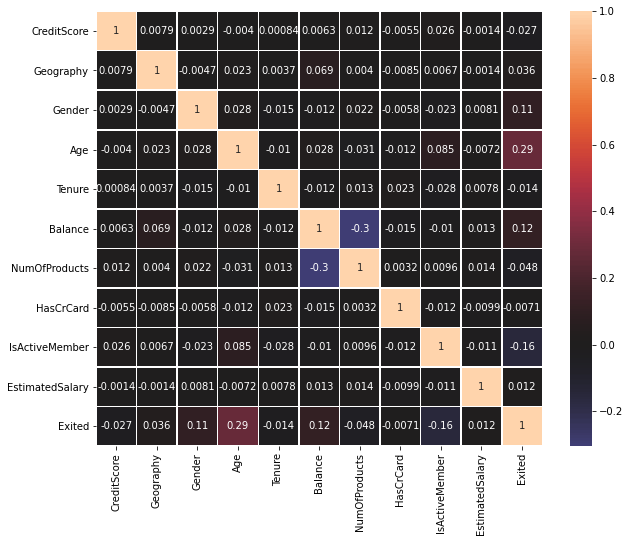

In [ ]:
plt.figure(figsize=(10,8))

sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0)
plt.show()

### **Insight**
There is no clear relationship between the variables.

## **Preparing the data for Model**

### **4. Distinguish the feature and target set and divide the data set into training and test sets**



In [ ]:
# Specify the data 
x_data = data.iloc[:, :-1]

In [ ]:
# Print the shape to  to match with the input_shape
x_data.shape

(10000, 10)

In [ ]:
# Specify the target 
y_data = data.iloc[:, -1]

In [ ]:
y_data.shape

(10000,)

In [ ]:
# Checking the data type to be numeric
x_data.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [ ]:
# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 7)

### **5. Normalize the train and test data**

In [ ]:
# Define the scaler 
scaler = StandardScaler().fit(X_train)
sc = StandardScaler()

# Scale the train set
X_train = scaler.transform(X_train)
#X_train = sc.fit_transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)
#X_test = sc.transform(X_test)

In [ ]:
X_train = preprocessing.normalize(X_train)

# Appling preprocessing to test data to compare after the model
X_test = preprocessing.normalize(X_test)

# **Creating a model**
### **Model 1**


*   Activation 1 layer = relu
*   Activation 2 layer = relu
*   Activation output layer = sigmoid
*   Learning rates = 0.01
*   epochs = 50


In [ ]:
model = Sequential()

In [ ]:
# Adding layers [layers and activations]
model.add(Dense(10, input_shape = (10,), activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Adding the optimizare (Adam)
sgd = optimizers.Adam(lr = 0.01)

In [ ]:
# Model should be "compiled" prior to training
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Pritn the model
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_46 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 6         
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model, epoch for this training 150
history = model.fit(X_train, y_train.values, batch_size = 700, epochs = 150, verbose = 1)

Epoch 1/150
12/12 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5544
Epoch 2/150
12/12 [==============================] - 0s 2ms/step - loss: 0.5362 - accuracy: 0.7935
Epoch 3/150
12/12 [==============================] - 0s 2ms/step - loss: 0.5055 - accuracy: 0.7937
Epoch 4/150
12/12 [==============================] - 0s 2ms/step - loss: 0.4873 - accuracy: 0.7916
Epoch 5/150
12/12 [==============================] - 0s 2ms/step - loss: 0.4624 - accuracy: 0.8021
Epoch 6/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4500 - accuracy: 0.7984
Epoch 7/150
12/12 [==============================] - 0s 2ms/step - loss: 0.4369 - accuracy: 0.7935
Epoch 8/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4160 - accuracy: 0.7972
Epoch 9/150
12/12 [==============================] - 0s 1ms/step - loss: 0.4118 - accuracy: 0.8104
Epoch 10/150
12/12 [==============================] - 0s 2ms/step - loss: 0.4013 - accuracy: 0.8196
Epoch 11/

In [ ]:
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

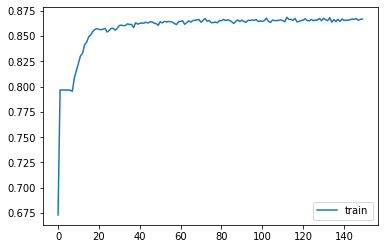

In [ ]:
plt.plot(hist['accuracy'])
plt.legend(("train" , "valid") , loc =0)

In [ ]:
# Evaluate test data
results = model.evaluate(X_test, y_test.values)

63/63 [==============================] - 0s 994us/step - loss: 0.3480 - accuracy: 0.8530


In [ ]:
# Print result for test data
print(model.metrics_names)
print(results) 

['loss', 'accuracy']
[0.34800130128860474, 0.8529999852180481]


### **7. Predict the results using 0.5 as a threshold**

In [ ]:
Y_pred_cls = (model.predict(X_test) > 0.5).astype("int32")
print(Y_pred_cls)

[[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [ ]:
data_labels = pd.DataFrame(Y_pred_cls , columns = list(['Prediction_M1']))
data_labels['Prediction_M1'] = data_labels['Prediction_M1'].astype('category')

In [ ]:
x_data = x_data.join(data_labels)
x_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Prediction_M1
0,619,1,2,42,2,0.00,1,1,1,101348.88,1
1,608,3,2,41,1,83807.86,1,0,1,112542.58,0
2,502,1,2,42,8,159660.80,3,1,0,113931.57,0
3,699,1,2,39,1,0.00,2,0,0,93826.63,1
4,850,3,2,43,2,125510.82,1,1,1,79084.10,0


### **8. Print the Accuracy score and confusion matrix**

In [ ]:
model_1_acc = str(model.evaluate(X_test,y_test.values)[1])
model_1_rec = str(recall_score(y_test.values,Y_pred_cls))
model_1_pre = str(precision_score(y_test.values, Y_pred_cls))
model_1_f1 = str(f1_score(y_test.values,Y_pred_cls))
print(model_1_acc)
print(model_1_rec)
print(model_1_pre)
print(model_1_f1)

63/63 [==============================] - 0s 977us/step - loss: 0.3480 - accuracy: 0.8530
0.8529999852180481
0.5182481751824818
0.6893203883495146
0.5916666666666667


Text(69.0, 0.5, 'Actual')

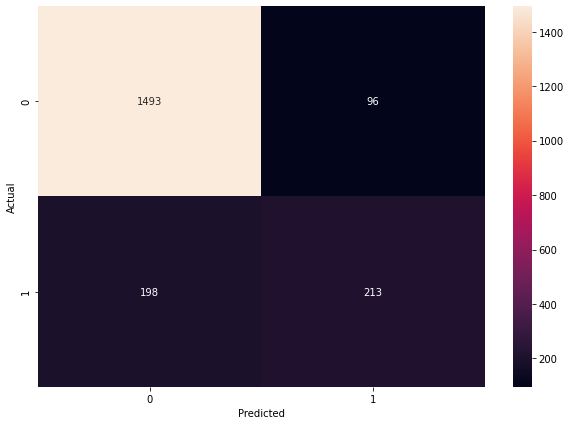

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=Y_pred_cls)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

### **Model 2**


*   Activation 1 layer = relu
*   Activation 2 layer = relu
*   Activation output layer = sigmoid
*   Learning rates = 0.001
*   epochs = 50


In [ ]:
model_2 = Sequential()

In [ ]:
# Adding layers [layers and activations]
model_2.add(Dense(64, input_shape = (10,), activation = 'relu'))
model_2.add(Dense(32, activation = 'relu'))
model_2.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Adding the optimizare (Adam)
sgd = optimizers.Adam(lr = 0.001)

In [ ]:
# Model should be "compiled" prior to training
model_2.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Pritn the model
model_2.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_37 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 33        
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model, epoch for this training 150
history = model_2.fit(X_train, y_train.values, batch_size = 700, epochs = 150, verbose = 1)

Epoch 1/150
12/12 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.6160
Epoch 2/150
12/12 [==============================] - 0s 2ms/step - loss: 0.5996 - accuracy: 0.8029
Epoch 3/150
12/12 [==============================] - 0s 2ms/step - loss: 0.5412 - accuracy: 0.7972
Epoch 4/150
12/12 [==============================] - 0s 2ms/step - loss: 0.4956 - accuracy: 0.8018
Epoch 5/150
12/12 [==============================] - 0s 2ms/step - loss: 0.4779 - accuracy: 0.7974
Epoch 6/150
12/12 [==============================] - 0s 2ms/step - loss: 0.4633 - accuracy: 0.7992
Epoch 7/150
12/12 [==============================] - 0s 2ms/step - loss: 0.4570 - accuracy: 0.7974
Epoch 8/150
12/12 [==============================] - 0s 2ms/step - loss: 0.4488 - accuracy: 0.7954
Epoch 9/150
12/12 [==============================] - 0s 2ms/step - loss: 0.4315 - accuracy: 0.8024
Epoch 10/150
12/12 [==============================] - 0s 2ms/step - loss: 0.4339 - accuracy: 0.7973
Epoch 11/

In [ ]:
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

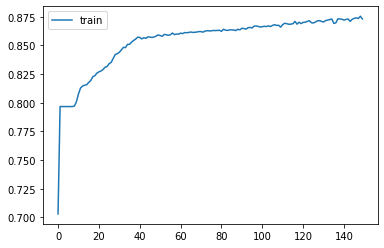

In [ ]:
plt.plot(hist['accuracy'])
plt.legend(("train" , "valid") , loc =0)

In [ ]:
results = model_2.evaluate(X_test, y_test.values)

63/63 [==============================] - 0s 958us/step - loss: 0.3565 - accuracy: 0.8465


In [ ]:
print(model_2.metrics_names)
print(results) 

['loss', 'accuracy']
[0.3564547300338745, 0.8464999794960022]


### **7. Predict the results using 0.5 as a threshold**

In [ ]:
Y_pred_cls = (model_2.predict(X_test) > 0.5).astype("int32")
print(Y_pred_cls)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [ ]:
data_labels = pd.DataFrame(Y_pred_cls , columns = list(['Prediction_M2']))
data_labels['Prediction_M2'] = data_labels['Prediction_M2'].astype('category')

In [ ]:
x_data = x_data.join(data_labels)
x_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Prediction_M1,Prediction_M2
0,619,1,2,42,2,0.00,1,1,1,101348.88,1,0
1,608,3,2,41,1,83807.86,1,0,1,112542.58,0,0
2,502,1,2,42,8,159660.80,3,1,0,113931.57,0,0
3,699,1,2,39,1,0.00,2,0,0,93826.63,1,1
4,850,3,2,43,2,125510.82,1,1,1,79084.10,0,0


### **8. Print the Accuracy score and confusion matrix**

In [ ]:
model_2_acc = str(model_2.evaluate(X_test,y_test.values)[1])
model_2_rec = str(recall_score(y_test.values,Y_pred_cls))
model_2_pre = str(precision_score(y_test.values, Y_pred_cls))
model_2_f1 = str(f1_score(y_test.values,Y_pred_cls))
print(model_2_acc)
print(model_2_rec)
print(model_2_pre)
print(model_2_f1)

63/63 [==============================] - 0s 919us/step - loss: 0.3565 - accuracy: 0.8465
0.8464999794960022
0.43552311435523117
0.7047244094488189
0.5383458646616542


Text(69.0, 0.5, 'Actual')

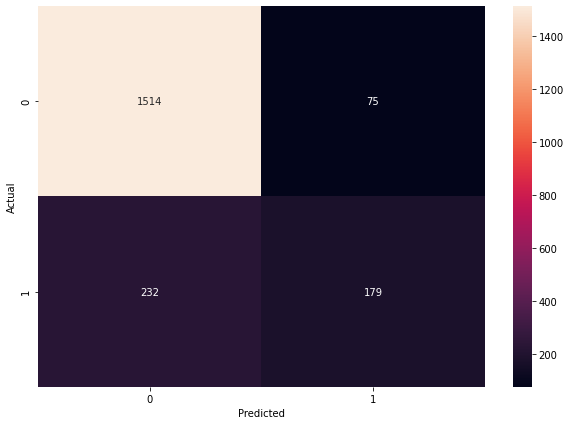

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=Y_pred_cls)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

### **Model 3**

*   Activation 1 layer = relu
*   Activation 2 layer = relu
*   Activation output layer = sigmoid
*   Learning rates = 0.0001
*   epochs = 50


In [ ]:
model_3 = Sequential()

In [ ]:
# Adding layers [layers and activations]
model_3.add(Dense(64, input_shape = (10,), activation = 'relu'))
model_3.add(Dense(32, activation = 'relu'))
model_3.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Adding the optimizare (Adam)
sgd = optimizers.Adam(lr = 0.0001)

In [ ]:
# Model should be "compiled" prior to training
model_3.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Pritn the model
model_3.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_40 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 33        
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model, epoch for this training 150
history = model_3.fit(X_train, y_train.values, batch_size = 700, epochs = 150, verbose = 1)

Epoch 1/150
12/12 [==============================] - 0s 2ms/step - loss: 0.7198 - accuracy: 0.2727
Epoch 2/150
12/12 [==============================] - 0s 2ms/step - loss: 0.7112 - accuracy: 0.3214
Epoch 3/150
12/12 [==============================] - 0s 2ms/step - loss: 0.7029 - accuracy: 0.3987
Epoch 4/150
12/12 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.4698
Epoch 5/150
12/12 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.5634
Epoch 6/150
12/12 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.6296
Epoch 7/150
12/12 [==============================] - 0s 3ms/step - loss: 0.6750 - accuracy: 0.6872
Epoch 8/150
12/12 [==============================] - 0s 2ms/step - loss: 0.6686 - accuracy: 0.7305
Epoch 9/150
12/12 [==============================] - 0s 2ms/step - loss: 0.6620 - accuracy: 0.7635
Epoch 10/150
12/12 [==============================] - 0s 2ms/step - loss: 0.6548 - accuracy: 0.7862
Epoch 11/

In [ ]:
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

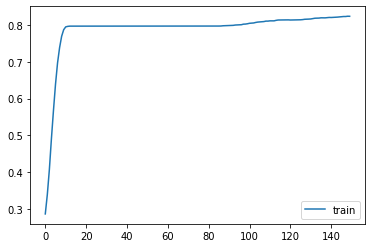

In [ ]:
plt.plot(hist['accuracy'])
plt.legend(("train" , "valid") , loc =0)

In [ ]:
results = model_3.evaluate(X_test, y_test.values)

63/63 [==============================] - 0s 945us/step - loss: 0.4119 - accuracy: 0.8235


In [ ]:
print(model_3.metrics_names)
print(results) 

['loss', 'accuracy']
[0.41188889741897583, 0.8234999775886536]


### **7. Predict the results using 0.5 as a threshold**

In [ ]:
# Predict the results using 0.5 as a threshold
Y_pred_cls = (model_3.predict(X_test) > 0.5).astype("int32")
print(Y_pred_cls)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [ ]:
data_labels = pd.DataFrame(Y_pred_cls , columns = list(['Prediction_M3']))
data_labels['Prediction_M3'] = data_labels['Prediction_M3'].astype('category')

In [ ]:
x_data = x_data.join(data_labels)
x_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Prediction_M1,Prediction_M2,Prediction_M3
0,619,1,2,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,3,2,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,1,2,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,1,2,39,1,0.00,2,0,0,93826.63,1,1,0
4,850,3,2,43,2,125510.82,1,1,1,79084.10,0,0,0


### **8. Print the Accuracy score and confusion matrix**

In [ ]:
model_3_acc = str(model_3.evaluate(X_test,y_test.values)[1])
model_3_rec = str(recall_score(y_test.values,Y_pred_cls))
model_3_pre = str(precision_score(y_test.values, Y_pred_cls))
model_3_f1 = str(f1_score(y_test.values,Y_pred_cls))
print(model_3_acc)
print(model_3_rec)
print(model_3_pre)
print(model_3_f1)

63/63 [==============================] - 0s 949us/step - loss: 0.4119 - accuracy: 0.8235
0.8234999775886536
0.23357664233576642
0.7164179104477612
0.35229357798165134


Text(69.0, 0.5, 'Actual')

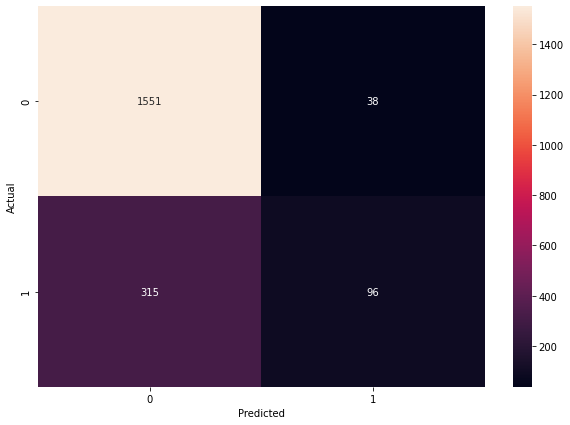

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=Y_pred_cls)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# **Results of the Models**

- Three models have been calculated with optimizers Adam and different learning rate (0.01, 0,001, 0,0001) 
- All model have epoch=150
- The imput layers for the three model have been considered relu as an activition funtion as well for hidden layer. For the output layer have been considerer sigmoid funcion.
- As loss function binary crossentropy

In [ ]:
result = pd.DataFrame({'Model':['M1', 'M2', 'M3'], 'Learning Rate': [0.01, 0.001, 0.0001 ], 'Accuracy': [model_1_acc, model_2_acc, model_3_acc], 'Recall':[model_1_rec, model_2_rec, model_3_rec], 'Precision':[model_1_pre, model_2_pre, model_3_pre], 'F1':[model_1_f1, model_2_f1, model_3_f1]})
result = result[['Model', 'Learning Rate', 'Accuracy', 'Recall', 'Precision', 'F1']]
result

,Model,Learning Rate,Accuracy,Recall,Precision,F1
0,M1,0.0100,0.8295000195503235,0.5255474452554745,0.5966850828729282,0.5588615782664942
1,M2,0.0010,0.8464999794960022,0.43552311435523117,0.7047244094488189,0.5383458646616542
2,M3,0.0001,0.8234999775886536,0.23357664233576642,0.7164179104477612,0.35229357798165134


- The model 1 with lr 0.01 has an accuracy of 0.84 and recall 0.53
- The model 2 with lr 0.001 has an acurracy of 0.85 but a recall of 0.45
- The model 3 with lr 0.0001 has an acurracy of 0.83 and a recall of 0.27

Since in this case we are trying to predict those customers who might leave the bank, it is important to identify those who have decided to leave the bank and focus the future campaing again those clients. 

For the model we must reduce the number of cases of users who were predicted to be 0 and actually are 1 and left the bank. So recall is an important measure. 

For the model with a learning rate of 0.01 we have the best performance of recall and the acurracy of the model is almost the same compare with the others.As precision for the others two models is better, F1 can be a better mesure of the performance. For the model 1 F1 has a better result. 

As a result model 1 with lerning rate 0.01 has a better performance considered all performance mesure.